# Homework 3  | Classifying People 
### Assigned Friday, 6 Apr 2018  /  Due Monday, 16 Apr  2018

#### Goal:
Using unsupervised learning we're going to construct a classifer by examining individual language usage. Next we're going to use this classifier to predict the political affliation of a group of people. Finally, we're going to use this exercise to reflect, analyze, and explore how such practices both reify and challenge our contemporary understanding of community and the public discourse. 

More specifically, you're going to
1. Tokenize and get word counts for a set of tweets;
2. see how these twitter user accounts cluster based on word usage using PCA;
3. explore how word usage is (or isn't) a good proxy for political affliation for people in public office.

#### To do this homework, you will also need the following files (which are also provided in github with this homework):
1. 2016tweets.csv (which is 19 MB so be sure you have a good internet connection!) 
2. pol_aff.csv

## Homework Problems 
#### This assignment is to be done on your own. Provide your code to justify your answer to each question.  Be sure to rename this homework so that it includes your name. 

## Step 1: Getting Word Frequencies For All Words in each tweet

### question 1 [1 points]
Ingest the file 2016tweets.csv into pandas as a dataframe entitled "tweets". Note that each tweet is a row. (You can find this file in the github repo in the same folder as this homework.) 
  

In [1]:
import pandas as pd
from sklearn.decomposition import PCA  
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np


# read tweet csv into df. 
tweets = pd.read_csv('2016tweets.csv')
tweets.dropna(inplace=True)
tweets = tweets.reset_index(drop=True)

In [2]:
len(tweets) # How many total tweets? (this is after dropping tweets with NAN values in tweet ID)

114673

In [24]:
tweets.tail()

,id,user_id,created_at,tweet_text
114668,702222217518698496,1.321432e+09,2016-02-23 20:03:17,"RT @DwightEvansPA: ""No one has gotten more don..."
114669,701569631874629634,1.321432e+09,2016-02-22 00:50:09,.@JoshShapiroPA is a proven reformer and he is...
114670,698157622470512640,1.321432e+09,2016-02-12 14:52:02,"""Wolf has the facts on his side. As he said in..."
114671,697112619791024128,1.321432e+09,2016-02-09 17:39:34,If Harrisburg doesn't stop playing games w/ th...
114672,688057856298475520,1.321432e+09,2016-01-15 17:59:11,"65,914 Pennsylvanians to Republican Leaders: P..."


### question 2 [4 points]
1. What day and time was the oldest tweet in the data set posted? Hint: use `tweets['created_at'].min()`.
2. What day and time was the most recent tweet in the data set posted?
3. How many *tweets* does the data set have? 
4. How many unique twitter users does the data set have? 


In [4]:
# What day and time was the oldest tweet in the data set posted? Hint: use tweets['created_at'].min().
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

# Citation: https://stackoverflow.com/questions/28133018/convert-pandas-series-to-datetime-in-a-dataframe
print("Oldest tweet = ", tweets['created_at'].min())

# What day and time was the most recent tweet in the data set posted?
print("Newest tweet = ", tweets['created_at'].max())

# How many tweets does the data set have?
# This code identifies and counts tweet rows to count tweets in the df. 
print("Number of tweets: ", len(tweets))

# How many unique twitter users does the data set have?
print("Number of users: ", tweets['user_id'].nunique())

Oldest tweet =  2016-01-01 00:16:30
Newest tweet =  2017-01-29 23:58:10
Number of tweets:  114673
Number of users:  125


### question 3 [30 points]
Use *sklearn's CountVectorizer* to produce a table of word counts in which each tweet is a row and each word is a column. Name this table "wc".

For a simple example of using sklearn countvectorizer to produce a table like this, see below. Note that this example just uses three made-up tweets so that it's easier to see what's happening.  

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Here we list a few sample strings, where each 
# string can be considered one text. For the tweets 
# dataframe you'll to produce a list in which each tweet is one string.  
# The string "The animal is large" is text 0 below; the string
# "is is is" is text 1 below; etc.
three_tweets = ["The animal is large.", "is is is", "The can't"]

# create vectorizer 
cv = CountVectorizer()

# tokenize texts & get vocabulary
cv.fit(three_tweets) #note that the sklearn tokenizer turns "can't" into "can"

# create a dictionary where each word is given an index number.
# If you need to know what word a number represents, refer back to this dictionary
word_index = cv.vocabulary_
word_index

{'the': 4, 'animal': 0, 'is': 2, 'large': 3, 'can': 1}

In [7]:
# to find out what column number a particular word is, say, "animal" we can use 
word_index["animal"]

0

In [8]:
# generate a table of tweets vs words
word_counts = cv.transform(three_tweets)

# and get the "shape" of this table like this:
word_counts.shape
# where the 3 rows are the three tweets and the 
# 5 columns are the 5 words in this corpus 

(3, 5)

In [9]:
# to get dataframe of with words instead of word index numbers:
feature_names = cv.get_feature_names()
word_counts_df = pd.SparseDataFrame(word_counts, columns=feature_names).fillna(0)
word_counts_df

,animal,can,is,large,the
0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,3.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0


In [10]:
# Finally, you can dump the word_counts table into an array
# where each row is a tweet, each column is a word type, and each
# element is a word token count (where each word is denoted by a number
# as defined in the word_index). For difference between word types and word tokens, 
# see "type-token distinction" in wikipedia.
wc = word_counts.toarray()
wc

array([[1, 0, 1, 1, 1],
       [0, 0, 3, 0, 0],
       [0, 1, 0, 0, 1]])

You'll need to substitute the "three_texts" list with a list of all the tweets that appear in your data set.

#### Put your code for question 3 below:

In [11]:
# extract all_tweets from df as a list of strings. 
all_tweets = tweets['tweet_text']

# create vectorizer 
cv = CountVectorizer()

# tokenize texts & get vocabulary
cv.fit(all_tweets) # note that sklearn tokenizer turns "can't" into "can"

# create a dictionary where each word is given an index number.
word_index = cv.vocabulary_
word_index # if you want, you can put this into a pandas dataframe as we did for "word_counts_df" above

{'rt': 114897,
 'housejudiciary': 62811,
 'randy_forbes': 109657,
 'to': 129638,
 'lorettalynch': 81260,
 'is': 68038,
 'there': 128206,
 'legal': 79186,
 'reason': 110389,
 'that': 127715,
 'prohibits': 105183,
 'you': 148867,
 'from': 53026,
 'answering': 18750,
 'questions': 108419,
 'regarding': 110989,
 'investig': 67502,
 'rebeccaarainey': 110430,
 'grills': 57794,
 'on': 97674,
 'if': 65247,
 'any': 18879,
 'prohibition': 105180,
 'prevent': 104764,
 'her': 60932,
 'regar': 110986,
 'aircraftcarrier': 16657,
 'usnavy': 135482,
 'duty': 43203,
 'defend': 38897,
 'the': 127745,
 'nation': 90934,
 'our': 98911,
 'give': 55938,
 'what': 141899,
 'need': 91851,
 'do': 41566,
 'hasc': 59937,
 'https': 63458,
 'regardless': 110990,
 'of': 96742,
 'cause': 29654,
 'this': 128462,
 'crash': 35492,
 'we': 141166,
 'be': 22827,
 'better': 23657,
 'equipping': 47040,
 'men': 85585,
 'amp': 18151,
 'women': 143377,
 'in': 66352,
 'uniform': 134257,
 'so': 121314,
 'they': 128379,
 'can': 288

In [12]:
# generate a table of tweets vs words
word_counts = cv.transform(all_tweets)

# dump the word_counts table into an array
word_counts.shape # this is just to check dimensions of the array. Should be as many rows as tweets

(114673, 152347)

In [13]:
# dump the word_counts table into an array
wc = word_counts.toarray()
wc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### NOTE: ABOVE CODE MAY ACTUALLY BE TO MEMORY INTENSIVE FOR SOME OLDER COMPUTERS. IF YOU GET A MEMORY ERROR OR KERNEL CRASH, TRY THE ABOVE FOR `all_tweets[0:10000]` rather than `all_tweets`. 

## Step 2: Find word usage for each twitter account

### question 4 [20 points]
The table wc give us the word counts for all tweets, but what we really want is a table of word counts *for all twitter accounts in our data set* (i.e., word counts for all tweets for each account).  

Make a new table called "wc_accounts" where each row is a twitter account user and the columns are word token counts for unique word types. (Note 2:  In the dataframe "tweets", a "user_id" is provided for each tweet.) You'll probably want to generate wc_accounts using a for loop that 
1. adds all the word counts in all the tweets written by the same account 
2. writes these account word counts to a new row;
3. and then repeats for all twitter accounts in corpus. 

However, as usual, there's more than one way to do this. Do whatever way makes most sense to you.

#### Put your code for question 4 below: 

In [15]:
#get twitter users from the dataframe
twitter_users = tweets['user_id'].unique()
temp_results = []

for user in twitter_users:
    print(user)
    #get rows where user had a tweet
    u_tweets = tweets.index[tweets['user_id'] == user].tolist()
    #convert rows of tweets into numpy array
    u_array = np.array(u_tweets)
    #sum word counts using numpy array 
    results = sum(wc[u_array])
    #save these results to a list 
    temp_results.append(results)

    
wc_accounts = np.array(temp_results)

15160884.0
76649729.0
21111098.0
1074278209.0
8.17076257770836e+17
2914571740.0
1058256326.0
140519774.0
2869746172.0
236916916.0
18967498.0
235373000.0
558769636.0
234128524.0
85396297.0
20015903.0
20467163.0
248495200.0
89193992.0
1077446982.0
248850174.0
50152441.0
76456274.0
296245061.0
2433737761.0
213795411.0
1410590874.0
1009269193.0
29450962.0
1072008757.0
22669526.0
216481299.0
18773159.0
33537967.0
131018989.0
235217558.0
161791703.0
1339931490.0
248699486.0
237763317.0
970207298.0
1064206014.0
240812994.0
13491312.0
385429543.0
19394188.0
2951574214.0
1444015610.0
158398519.0
34308692.0
1089334250.0
1404269089.0
7.989730323626066e+17
2974648323.0
776664410.0
26103389.0
3018670151.0
937723303.0
94492750.0
2962923040.0
229966028.0
8.166832740766147e+17
18137749.0
2962891515.0
33563161.0
235312723.0
2696643955.0
299578411.0
15361570.0
2962868158.0
942156122.0
84119348.0
1096059529.0
48724141.0
134249298.0
72198806.0
20546536.0
20552026.0
232992031.0
2962813893.0
18166778.0
2311

In [16]:
wc_accounts

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 9, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

#### NOTE: THE CODE ABOVE WILL TAKE SOME TIME TO EXECUTE (~4 minute on I7 laptop with 16 GB RAM) AND MAY BE TOO MEMORY INTENSIVE FOR SOME OLDER COMPUTERS. IF YOU GET A MEMORY ERROR OR KERNEL CRASH, TRY THE ABOVE FOR A SMALLER SUBSET OF `twitter_users`. 

## Step 3: Perform PCA on wc_accounts

Now that we have wc_acounts, we'd like to plot this to see how all these accounts use language. But how plot this in two dimensions? Let's use a form of unsupervised learning called PCA, where each account (i.e., each row) represents one data point. This is effectivey the same as the PCA we performed on the Iris and Spearman data sets in lab 5. And we can plot our twitter account data in exactly in the same way we did then.   

However, we have one additional wrinkle in our task. It'd be helpful to know which political affliation each individual twitter account has. Fortunately, I have this data for you! In pol_aff.csv I have included user_ID and their respective political affliation. Use this csv to get the political association of each user account. Note that this file may include user_IDs that don't exist in your corpus of tweets so you'll need to selective add political affliation based on user IDs. 

### question 5 [25 points]
Perform PCA on individual user accounts using the data in wc_accounts. Plot this in 2 dimensions where each data point represents one twitter account. Color code each data point according to account political affliation, with red = republicans and blue = democrats. To make overlapping data points easier to see, reduce the opacity (i.e., the "alpha" parameter) to 0.3. 


#### Put your code for question 5 below:

In [20]:
# ONE WAY TO GENERATE LIST OF USER_IDs AND AFFLIATIONS
# (AS PERFORMED BY ONE OF YOUR FELLOW STUDENTS!)

#read political affiliation csv
political_affiliation = pd.read_csv("pol_aff.csv")

#dataframe of unique twitter users (to match them with array)
twitter_users_df = pd.DataFrame({'user_id': tweets['user_id'].unique()})


#merge userid and array with political affiliation
merged_data = pd.merge(twitter_users_df, political_affiliation[['id','affliation']],  left_on=['user_id'], right_on=['id'], how='left')

#drop duplicate user id column that came from above merge
merged_data = merged_data.drop(['id'], axis=1)
merged_data.head()

,user_id,affliation
0,1.51609e+07,republican
1,7.66497e+07,republican
2,2.11111e+07,republican
3,1.07428e+09,democrat
4,8.17076e+17,democrat


In [22]:
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA 

# Adapted from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = sklearnPCA(n_components=2)
PCs = pca.fit_transform(wc_accounts)
pc_Df = pd.DataFrame(data = PCs
             , columns = ['principal component 1', 'principal component 2'])

Df = pd.concat([pc_Df, merged_data[['affliation']]], axis = 1)

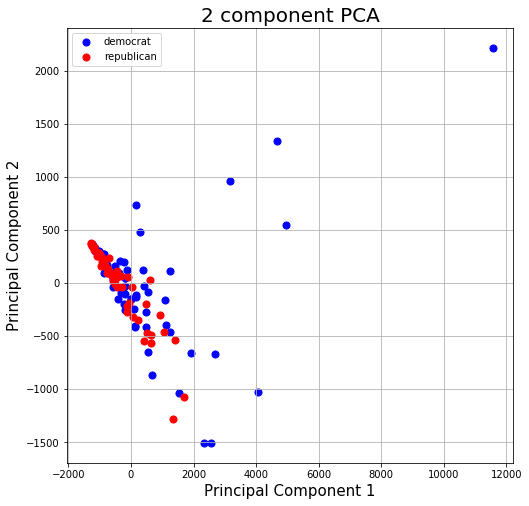

In [23]:
# ONE WAY TO PLOT PCA DATA

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['democrat', 'republican']
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = Df['affliation'] == target
    ax.scatter(Df.loc[indicesToKeep, 'principal component 1']
               , Df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Step 4: Reflection: Choose your own adventure

## Provide an answer to either question 6 or question 7 but not both.


### question 6 [30 points, 350 words max] --  Post-Analysis Reflection: Using language to track political affliation
Write a short reflection about what you did in steps 1 - 3, specifically focusing on what assumptions are required for us to see language usage as a meaningful proxy for political affliation. The point is not to say what assumptions you agree with; but rather what would you have to believe to take the results of this investigation seriously. Are these assumptions tenable for inferring political affliation? Your answer will be graded on style, clarity, insight, and creativity.

Be sure to address the following questions in your answer:
1. Via visual inspection of your PCA plot in step 3, does our analysis of word usage effectively identify political affliations?  
2. What are some ways in which we could use *subsets of the vocabulary* as a better proxy for political affliation? How? What new problems might this cause? Are there other ways this proxy might be improved?
3. From step 1, you know what time period these tweets span. How might this influence the results of clustering by political affliation? 
4. From lab 5, we saw that when applied to texts, PCA was sensitive to word length of texts being examined, i.e., longer texts tended to cluster together and shorter texts tended to cluster together. Without actually doing the analysis, how might you check to see if this was influencing your results?

#### Answers:
These are summary points. Actual answers may vary significantly.
1. There is a tighter spread among republicans than democrats. That said, there is also significant overlap, which makes it tricky to identify political affliation merely from position in PCA plot above.
2. We could use stop words to exclude shared vocabulary between republicans and democrats--this would produce a very different plot. We might use such a stop word list to try to predict political afflication on previously "unseen" twitter users. 
3. For example, if we produced a stop word list for republicans and democrats from this data, it might be heavily skewed towards the political events of that moment. 
4. You could color code the user data points by tweet word length (as we did in lab 5 for texts) and see if the clustering of users is really produced by the length of tweets. 

### question 7 [30 points, 350 words max] -- Unsupervised learning proxies as a way of imagining communities 
We looked at tweets in this assignment as a way of tracking political affiliation, but one could apply these and other unsupervised learning techniques to group people in other ways. In our case clustering (and possible subsequent classification or categorization) is produced by an examination of the similarity of word usage--even though there is no obvious or necessary connection between word usage and political affiliation. We could examine any set of features (not just words) to cluster groups of people, look for what particular features “produce” clusters that make sense to us (using a test set to check our clusters, such as we did above with Democrats and Republicans), and then use these particular features to group new people (i.e., those whose political affiliations we do not have data).

Identify at least 4 problems with grouping people in this way. What are some of the assumptions required to group people using unsupervised learning as described in the above paragraph? Be sure to address the role of the corpus in constructing groups, and the various ethical considerations tied to this choice. You may wish to address the different contexts in which this grouping of people may occur. Feel free to cite any other examples of using unsupervised learning to construct groups of people to support your argument as well as any secondary literature you feel appropriate. Your answer will be graded on style, clarity, insight, and creativity.

#### Answers: 
These are summary points. Actual answers may vary significantly.

Our groupings depends on the data set we use to make our initial classifications and will reflect the historical idiosyncrasies of how that data was collected. To wit: our data set was collected at a particular time period when Trump was elected. This likely changes the words that were being used in political tweets. If we based Republican and Democrat word usage off this data, it might not be representative of word usage on twitter before or after this time. Likewise, word usage on other social media platforms may differ significantly from word usage on Twitter. Also, the socioeconomic makeup of Twitter users in political office may be a very poor proxy for the socioeconomic makeup of twitter users in general, so word usage may be a very poor proxy for political affliation. Etc. 